In [248]:
# import dbr
import cv2
# import numpy as npimport 
# import numpy as np
from matplotlib import pylab
import matplotlib.pyplot as plt
%matplotlib inline

In [249]:
def plot_image(image, title=""):
    pylab.title(title, size=20)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    pylab.axis("off")

In [250]:
def DetectQR(ImPath):
    image = cv2.imread(ImPath)
    original = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9,9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    
    # Morph close
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
    
    # Find contours and filter for QR code
    cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    # print(cnts)
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        x,y,w,h = cv2.boundingRect(approx)
        area = cv2.contourArea(c)
        ar = w / float(h)
        if len(approx) == 4 and area > 1000  and (ar > .85 and ar < 1.3):
            cv2.rectangle(image, (x, y), (x + w, y + h), (95,52,235), 4) #36,255,12
            ROI = original[y-5:y+h+5, x-5:x+w+10]
            cv2.imwrite('ROI.png', ROI)
    
    pylab.figure(figsize=(20,20))
    pylab.subplot(3,3,1)
    plot_image(image,"QR detecter")
    pylab.subplot(3,3,2)
    plot_image(gray,"gray Imge")
    pylab.subplot(3,3,3)
    plot_image(close,"Close Imge")


# detect QR

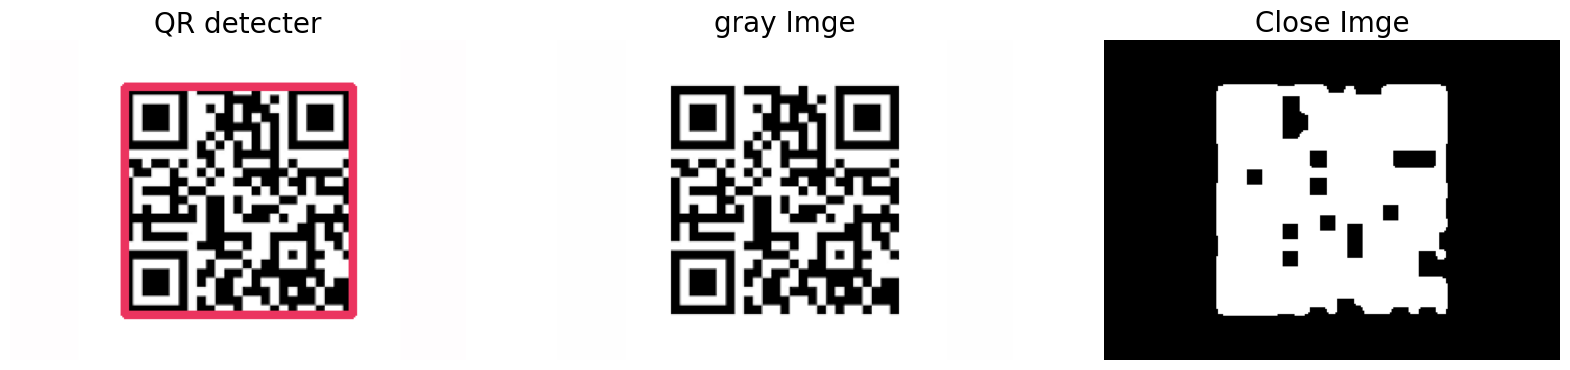

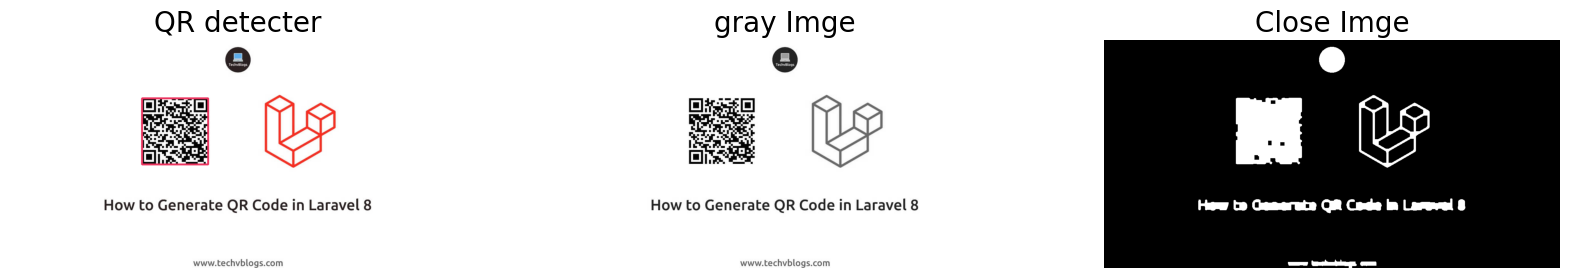

In [251]:
imgPath=['Img/q5.png','Img/q6.jpeg']
for imP in imgPath:
    DetectQR(imP)

# distinguishing between QR and BarCode

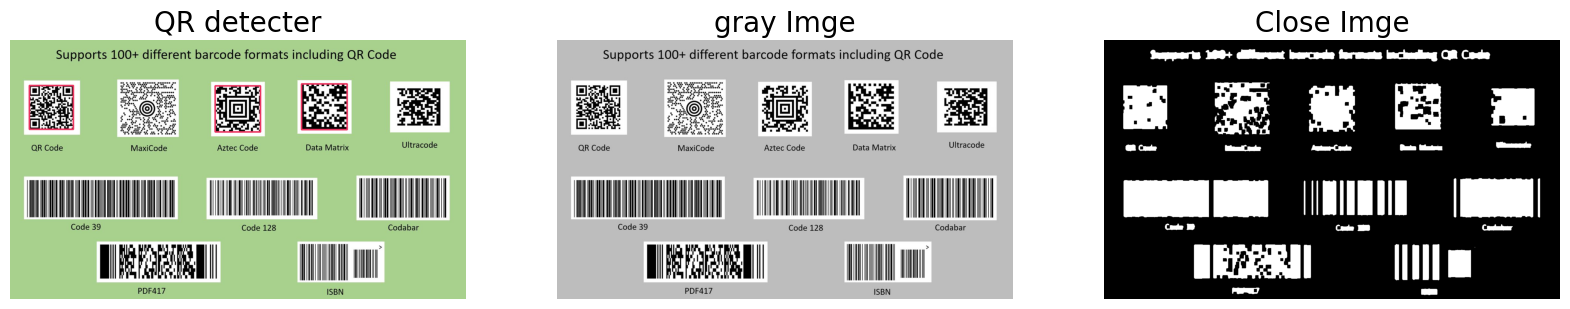

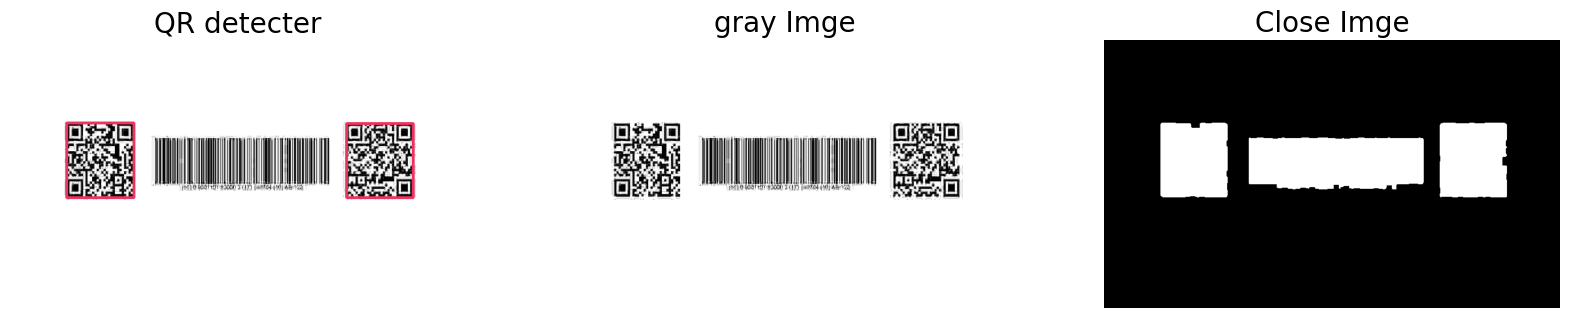

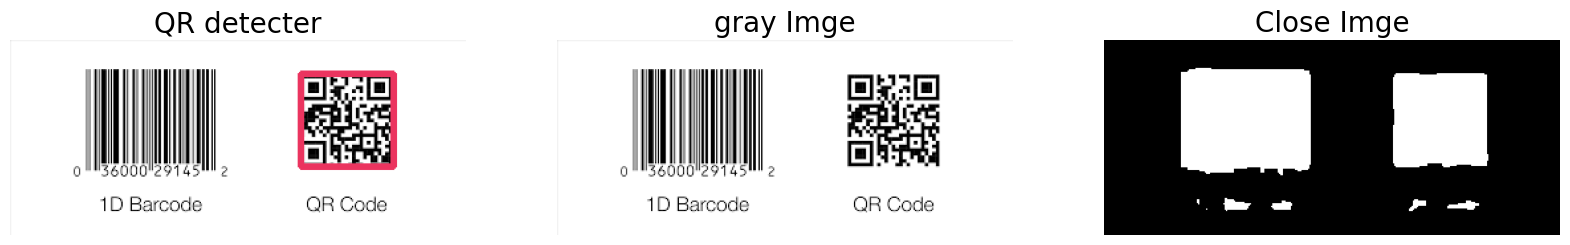

In [252]:
imgPath=['Img/vs.jpeg','Img/vs2.png','Img/vs3.png']
for imP in imgPath:
    DetectQR(imP)

# Ddetect QR in Document 

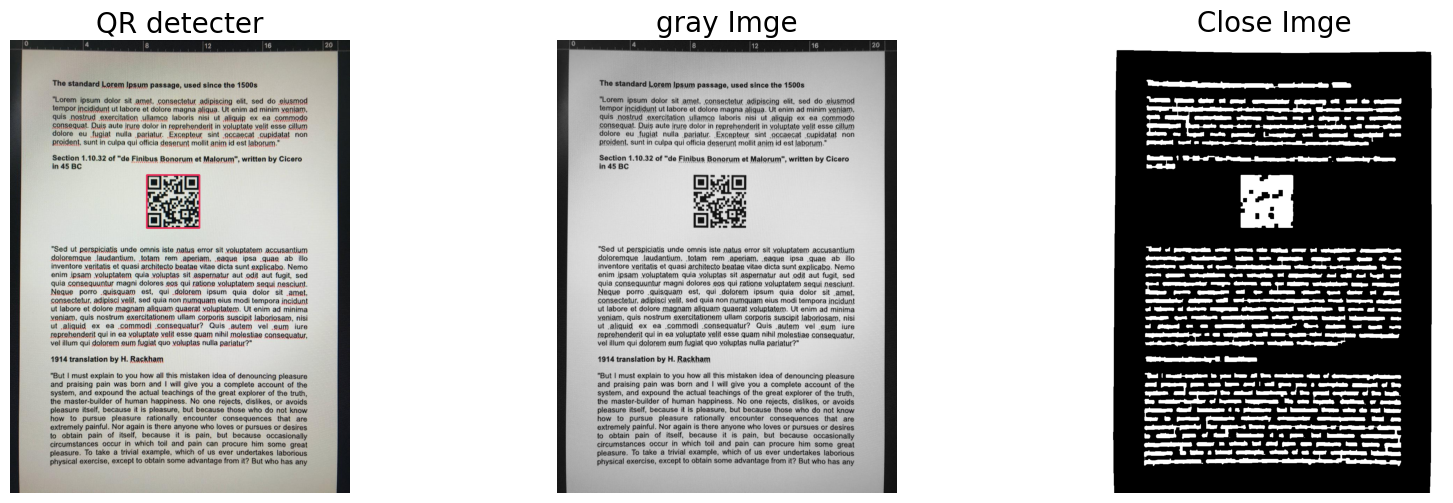

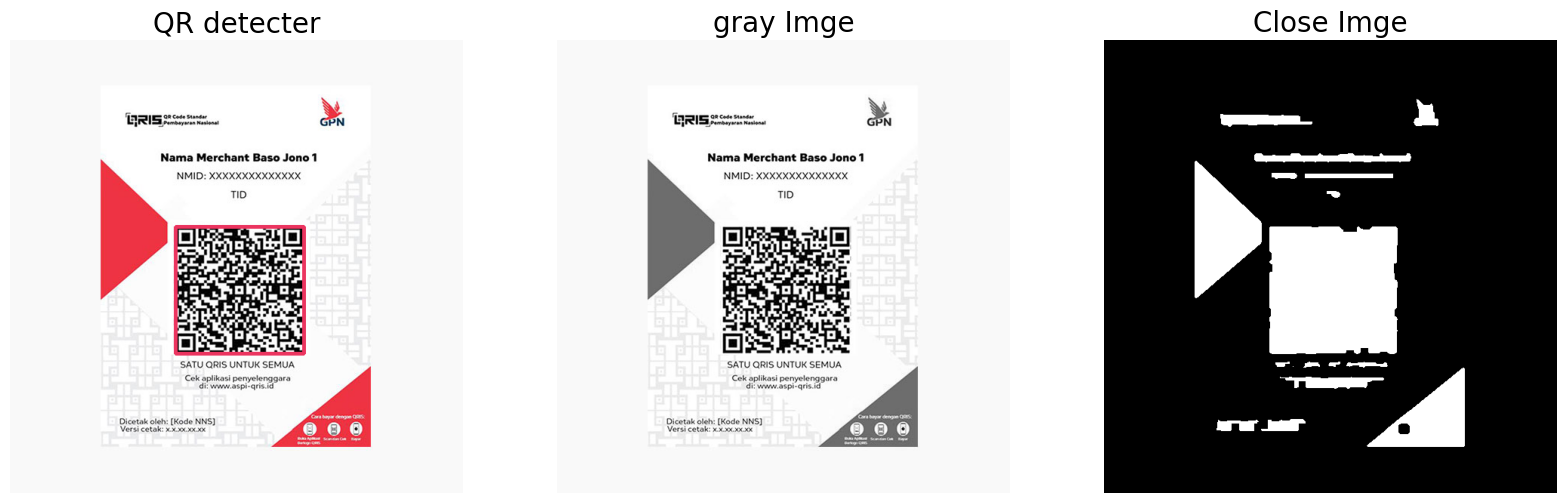

In [253]:
imgPath=['Img/q1.jpeg','Img/q4.jpeg']
for imP in imgPath:
    DetectQR(imP)

# Generat and Decode QRcode

In [254]:
import pyqrcode
import png
from pyqrcode import QRCode

In [255]:
def GenerateQR(s):
    QRgenrt = pyqrcode.create(s)
    QRgenrt.png('myqr.png', scale = 6)

In [256]:
def DecodQR(imgPth):    
    imgR=cv2.imread(imgPth)
    decoded = cv2.QRCodeDetector()
    reval, point, s_qr = decoded.detectAndDecode(imgR)
    print(reval)

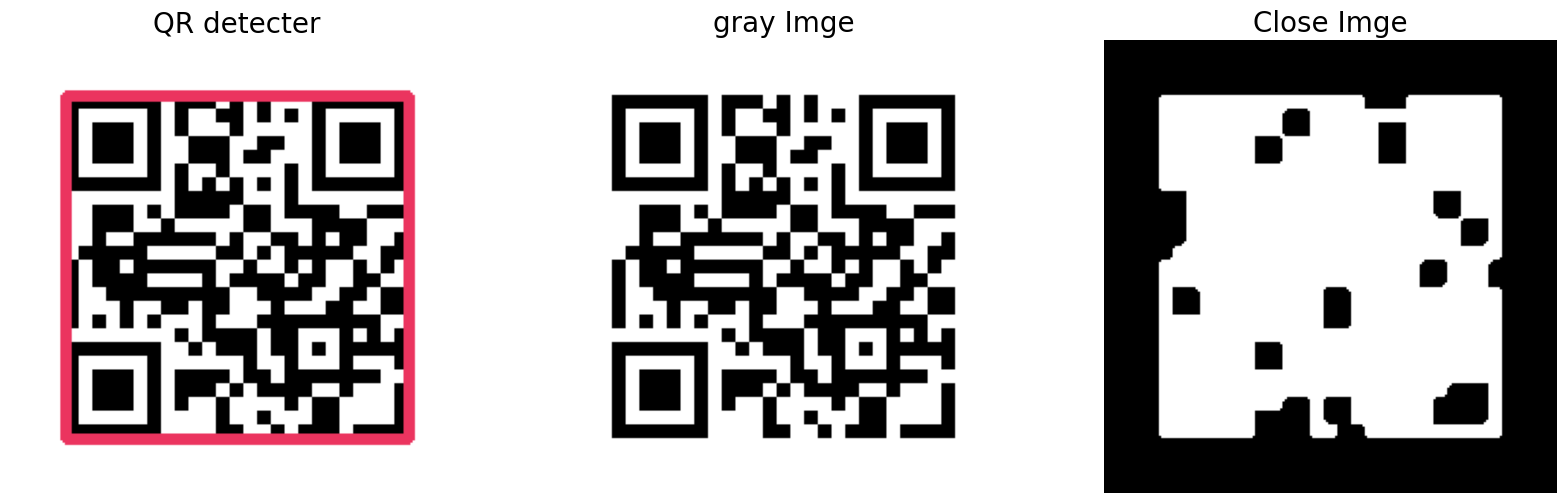

In [257]:
GenerateQR('Im Hneen')
DetectQR('myqr.png')

In [258]:
DecodQR('ROI.png')

Im Hneen
